Treine uma primeira versão do seu modelo com as seguintes configurações:
Activation: Tanh
Hidden: 160,5
Epochs: 20

In [2]:
# Treinar modelo com Tanh, [160, 5], 20 epochs
import h2o
from h2o.estimators import H2ODeepLearningEstimator

# Iniciar o servidor H2O
h2o.init()


# Importar os ficheiros CSV (train e test)
train = h2o.import_file("dataset/mnist_train.csv")
test = h2o.import_file("dataset/mnist_test.csv")


# Preparar os dados
# A primeira coluna é a label (dígito de 0 a 9)
train[0] = train[0].asfactor()
test[0] = test[0].asfactor()

# Definir colunas de entrada (pixels) e saída (label)
x = train.columns[1:]  # Features: 784 pixels
y = train.columns[0]   # Target: dígito (0-9)


# treinar o modelo
# Criar o modelo com as configurações pedidas
model_tanh = H2ODeepLearningEstimator(
    activation="Tanh",
    hidden=[160, 5],
    epochs=20,
    stopping_metric="misclassification",
    seed=1234
)

# Treinar o modelo com validação no conjunto de teste
model_tanh.train(x=x, y=y, training_frame=train, validation_frame=test)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,2 hours 21 mins
H2O_cluster_timezone:,Europe/Lisbon
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 days
H2O_cluster_name:,Alice Dias
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.340 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
deeplearning Model Build progress: |

C:\Users\Alice Dias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\h2o\estimators\estimator_base.py:192: RuntimeWarning: Dropping bad and constant columns: [27x28, 27x27, 4x28, 28x4, 28x3, 28x2, 26x28, 27x2, 27x1, 1x1, 25x2, 1x2, 25x1, 1x3, 3x1, 1x4, 3x2, 1x5, 5x1, 1x6, 21x1, 1x7, 7x1, 1x8, 1x9, 3x27, 3x28, 18x1, 25x28, 1x12, 2x25, 2x26, 2x27, 2x28, 1x17, 1x18, 1x19, 27x3, 1x10, 1x11, 28x28, 24x28, 28x1, 26x2, 26x1, 2x1, 24x2, 2x2, 24x1, 28x27, 2x3, 4x1, 28x26, 2x4, 4x2, 28x25, 6x1, 1x23, 6x2, 1x24, 1x25, 1x26, 1x27, 1x28, 1x20, 1x21, 1x22]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_model_python_1743517327096_4


Status of Neuron Layers: predicting label, 10-class classification, multinomial distribution, CrossEntropy loss, 115,745 weights/biases, 1.5 MB, 1,200,828 training samples, mini-batch size 1
    layer    units    type     dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight            weight_rms          mean_bias             bias_rms
--  -------  -------  -------  ---------  ----  ----  ---------------------  ---------------------  ----------  ---------------------  ------------------  --------------------  -------------------
    1        717      Input    0.0
    2        160      Tanh     0.0        0.0   0.0   0.2639761379310593     0.3429170846939087     0.0         -0.0061148327438072    0.12558513879776    0.025847458277188994  0.20483386516571045
    3        5        Tanh     0.0        0.0   0.0   0.0012296901475929189  0.0006218340713530779  0.0         -0.008761805431004178  0.1603718400001526  -0.12092750897361777  0.31156492233276367
    4        10       Softmax             0.0   0.0   0.01982851983048022    0.028974413871765137   0.0         0.10637714371085166    2.699774742126465   -1.657481557824785    0.8370497226715088

ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.007017633543246134
RMSE: 0.0837713169482618
LogLoss: 0.03248835155106039
Mean Per-Class Error: 0.007458381298635458
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0     1     2    3     4    5    6    7     8    9    Error       Rate
----  ----  ---  ----  ---  ---  ---  ----  ---  ---  ----------  ----------
994   0     0    0     0    1    0    0     1    0    0.00200803  2 / 996
0     1152  2    1     0    0    1    0     3    1    0.00689655  8 / 1,160
1     0     966  2     1    1    2    0     0    2    0.00923077  9 / 975
0     0     4    1015  0    0    1    1     1    4    0.0107212   11 / 1,026
0     0     0    1     941  1    0    2     1    1    0.0063358   6 / 947
2     0     2    1     1    900  2    1     0    0    0.00990099  9 / 909
0     0     0    0     1    1    984  0     0    0    0.0020284   2 / 986
1     0     0    1     1    2    0    1024  0    2    0.00678952  7 / 1,031
3     2     1    0     1    2    1    0     952  0    0.010395    10 / 962
1     0     1    0     1    1    0    5     1    963  0.0102775   10 / 973
1002  1154  976  1021  947  909  991  1033  959  973  0.00742599  74 / 9,965

Top-10 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.992574
2    0.996588
3    0.997792
4    0.998796
5    0.999197
6    0.999599
7    0.999699
8    0.999699
9    0.9999
10   1

ModelMetricsMultinomial: deeplearning
** Reported on validation data. **

MSE: 0.043512284107241395
RMSE: 0.2085959829604621
LogLoss: 0.23639613738544854
Mean Per-Class Error: 0.04750982139296124
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0    1     2     3     4    5    6    7     8    9     Error      Rate
---  ----  ----  ----  ---  ---  ---  ----  ---  ----  ---------  ------------
947  4     4     4     1    13   3    3     1    0     0.0336735  33 / 980
0    1120  2     1     0    0    3    1     8    0     0.0132159  15 / 1,135
7    0     

In [3]:
# Avaliar o modelo
# Avaliar com o conjunto de teste
perf_tanh = model_tanh.model_performance(test_data=test)

# Mostrar resultados
print("Accuracy top-1:", perf_tanh.hit_ratio_table().as_data_frame().iloc[0, 1])
print("Logloss:", perf_tanh.logloss())
print("Confusion Matrix:")
perf_tanh.confusion_matrix().show()

Accuracy top-1: 0.9529
Logloss: 0.23639613738544854
Confusion Matrix:


0,1,2,3,4,5,6,7,8,9,Error,Rate
947.0,4.0,4.0,4.0,1.0,13.0,3.0,3.0,1.0,0.0,0.0336735,33 / 980
0.0,1120.0,2.0,1.0,0.0,0.0,3.0,1.0,8.0,0.0,0.0132159,"15 / 1,135"
7.0,0.0,975.0,18.0,2.0,3.0,8.0,2.0,12.0,5.0,0.0552326,"57 / 1,032"
5.0,4.0,15.0,950.0,1.0,3.0,5.0,13.0,3.0,11.0,0.0594059,"60 / 1,010"
0.0,0.0,4.0,3.0,945.0,2.0,8.0,3.0,4.0,13.0,0.0376782,37 / 982
8.0,0.0,3.0,8.0,1.0,846.0,7.0,8.0,5.0,6.0,0.0515695,46 / 892
5.0,4.0,3.0,0.0,3.0,15.0,923.0,0.0,5.0,0.0,0.0365344,35 / 958
1.0,1.0,9.0,11.0,9.0,1.0,5.0,968.0,3.0,20.0,0.0583658,"60 / 1,028"
9.0,6.0,8.0,4.0,11.0,18.0,6.0,6.0,902.0,4.0,0.0739220,72 / 974
5.0,2.0,5.0,8.0,14.0,3.0,1.0,11.0,7.0,953.0,0.0555005,"56 / 1,009"


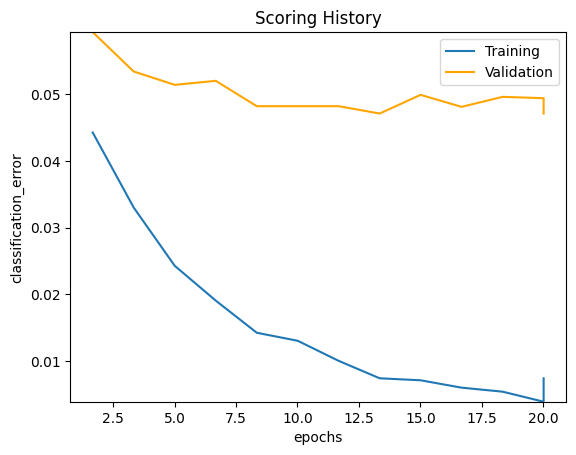

In [4]:
# (Opcional) Gráfico de evolução do treino
# Mostrar histórico do treino
model_tanh.plot()

O gráfico de Scoring History demonstra uma redução clara do erro de classificação no treino ao longo das 20 épocas. O erro de validação estabiliza entre as épocas 13 e 20, sugerindo q o modelo atinge o seu mlhr desempenho de generalização por volta dessa fase. N se observam sinais fortes de overfitting, e o modelo mostra-se estável e eficaz c os parâmetros definidos.